<a href="https://colab.research.google.com/github/hardik9977/-XT-Coding-Assignment/blob/main/spam_sms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import pandas as pd
import string

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [ ]:
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2016,ham,"Princess, is your kitty shaved or natural?",NaN,NaN,NaN
1858,ham,"Sir, i am waiting for your call.",NaN,NaN,NaN
820,ham,Good afternoon starshine! How's my boytoy? Doe...,NaN,NaN,NaN
5185,ham,I just cooked a rather nice salmon a la you,NaN,NaN,NaN


In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [ ]:
df['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [ ]:
df.sample()

,target,text
4868,ham,1. Tension face 2. Smiling face 3. Waste face ...


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.sample()

,target,text
1542,0,Now press conference da:)


In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.sample()

,target,text
417,1,FREE entry into our å£250 weekly competition j...


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

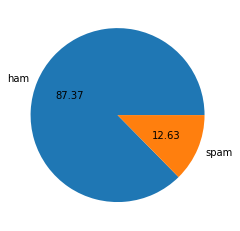

In [ ]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [ ]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['num_char'] = df['text'].apply(len)

In [ ]:
df.head(3)

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [ ]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [ ]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

Data Preprocessing

*   Lower Case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   stemming

In [ ]:
from nltk.stem import PorterStemmer

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  porter = PorterStemmer();
  for i in text:
    y.append(porter.stem(i))
  text = y[:]
  return " ".join(text)

In [ ]:
df['transform_text'] = df['text'].apply(transform_text)

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width=800, height=800, background_color='black')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

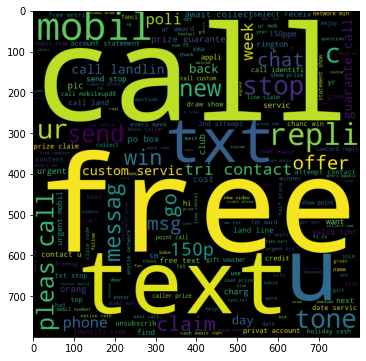

In [ ]:
plt.figure(figsize=(20,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

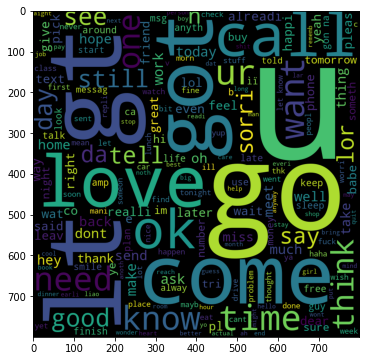

In [ ]:
plt.figure(figsize=(20,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []

for sentence in df[df['target'] == 1]['transform_text'].tolist():
  for word in sentence.split():
    spam_corpus.append(word)

from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
ham_corpus = []

for sentence in df[df['target'] == 0]['transform_text'].tolist():
  for word in sentence.split():
    ham_corpus.append(word)

from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

Model Bulding

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
cv = CountVectorizer()
tfid = TfidfVectorizer()

In [ ]:
X = tfid.fit_transform(df['transform_text']).toarray()

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8762088974854932
0.5231481481481481
[[793 103]
 [ 25 113]]


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9593810444874274
1.0
[[896   0]
 [ 42  96]]


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


Model Improve



1.   tfid max_feature parameter
2.   MinMax Scaler

